First five rows of the dataset:
  CustomerID  Age  Gender  Annual Income  Spending Score  Recency  Frequency  \
0  CUST00001   56    Male         130.05              16       52          1   
1  CUST00002   69    Male          19.78               1      102          7   
2  CUST00003   46  Female          59.42              63      216          4   
3  CUST00004   32  Female         140.76              21      188          1   
4  CUST00005   60  Female         114.25              30       57         15   

   Monetary Value  
0           22.14  
1            0.20  
2           21.32  
3           17.44  
4           37.73  

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      1000 non-null   object 
 1   Age             1000 non-null   int32  
 2   Gender          1000 non-null   object 
 3   Annual Income   1000

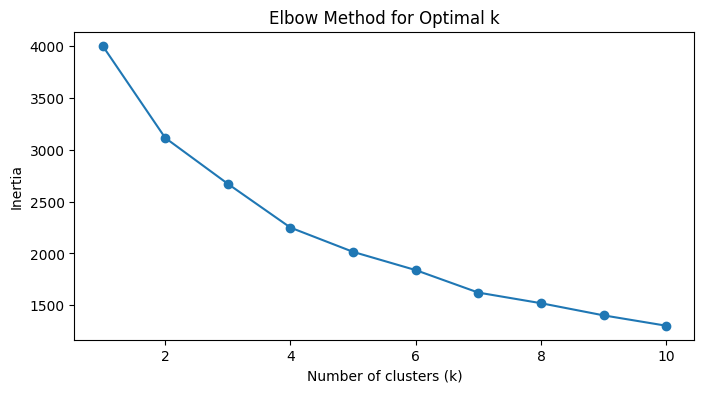

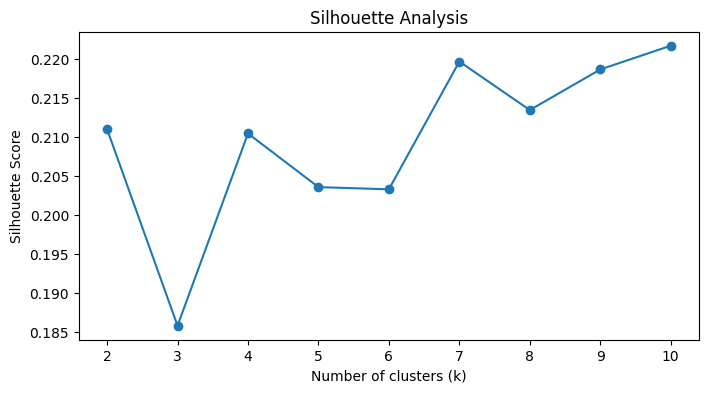


Cluster Profiles (Mean Values):
               Age  Annual Income  Spending Score     Recency  Frequency  \
Cluster                                                                    
0        54.008658     107.852035       67.619048  236.354978  26.761905   
1        36.859375     109.433203       24.058594  157.460938  24.949219   
2        28.204878      71.186098       74.551220  195.058537  26.282927   
3        54.191558      46.286656       41.269481  155.292208  25.321429   

         Monetary Value   RFM_Score  Cluster  
Cluster                                       
0             71.576190  334.693074      0.0  
1             26.382539  208.792695      1.0  
2             54.036732  275.378195      2.0  
3             17.739416  198.353052      3.0  


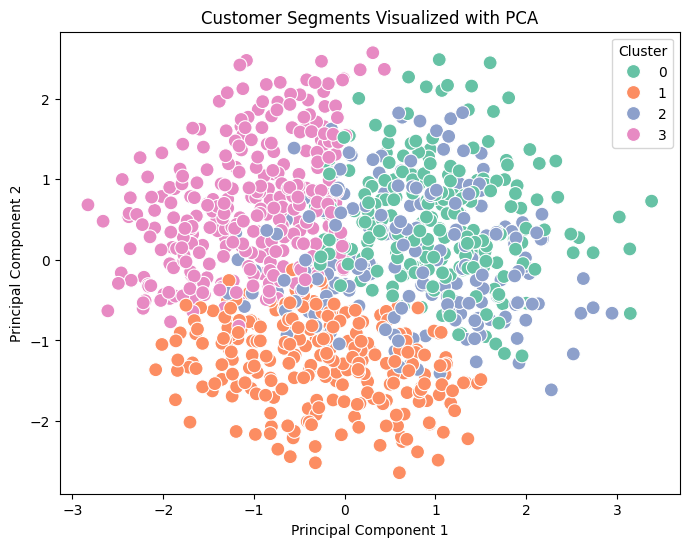


Cluster 0 Characteristics:
Age                54.008658
Annual Income     107.852035
Spending Score     67.619048
Recency           236.354978
Frequency          26.761905
Monetary Value     71.576190
RFM_Score         334.693074
Cluster             0.000000
Name: 0, dtype: float64

Cluster 1 Characteristics:
Age                36.859375
Annual Income     109.433203
Spending Score     24.058594
Recency           157.460938
Frequency          24.949219
Monetary Value     26.382539
RFM_Score         208.792695
Cluster             1.000000
Name: 1, dtype: float64

Cluster 2 Characteristics:
Age                28.204878
Annual Income      71.186098
Spending Score     74.551220
Recency           195.058537
Frequency          26.282927
Monetary Value     54.036732
RFM_Score         275.378195
Cluster             2.000000
Name: 2, dtype: float64

Cluster 3 Characteristics:
Age                54.191558
Annual Income      46.286656
Spending Score     41.269481
Recency           155.292208
Freq

In [1]:
 # Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic customer data
num_records = 1000

# CustomerID: Unique identifiers
customer_ids = [f"CUST{str(i).zfill(5)}" for i in range(1, num_records + 1)]

# Customer features
ages = np.random.randint(18, 71, size=num_records)
genders = np.random.choice(['Male', 'Female'], size=num_records)
annual_incomes = np.random.uniform(15, 150, size=num_records).round(2)
spending_scores = np.random.randint(1, 101, size=num_records)
recencies = np.random.randint(1, 366, size=num_records)
frequencies = np.random.randint(1, 51, size=num_records)
# Monetary Value correlated with Income and Spending Score
monetary_values = (annual_incomes * (spending_scores / 100) * np.random.uniform(0.5, 1.5, size=num_records)).round(2)

# Create DataFrame
df = pd.DataFrame({
    'CustomerID': customer_ids,
    'Age': ages,
    'Gender': genders,
    'Annual Income': annual_incomes,
    'Spending Score': spending_scores,
    'Recency': recencies,
    'Frequency': frequencies,
    'Monetary Value': monetary_values
})

print("First five rows of the dataset:")
print(df.head())

# Data Inspection
print("\nData info:")
print(df.info())

print("\nMissing values per column:")
print(df.isnull().sum())

# Data Cleaning: Drop missing values (if any)
df = df.dropna()

# Feature Engineering: Create RFM Score as an example
df['RFM_Score'] = df['Recency'] + df['Frequency'] + df['Monetary Value']

# Prepare features for clustering
features_for_clustering = ['Age', 'Annual Income', 'Spending Score', 'RFM_Score']

# Remove whitespace from column headers (if any)
df.columns = df.columns.str.strip()

# Optional: Encode categorical variables if needed
# For now, we exclude 'Gender' or could include if desired

# 5. Data Preprocessing
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_for_clustering])

# 6. Determine optimal number of clusters using Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# 7. Silhouette Score for k=2 to 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Choose optimal k based on the plots (e.g., k=4)
optimal_k = 4

# 8. Apply KMeans with chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to original data
df['Cluster'] = cluster_labels

# 9. Profiling Clusters
#cluster_profile = df.groupby('Cluster').mean()
numeric_cols = df.select_dtypes(include=['number']).columns
cluster_profile = df.groupby('Cluster')[numeric_cols].mean()


print("\nCluster Profiles (Mean Values):")
print(cluster_profile)

# 10. Visualize Clusters using PCA (for 2D visualization)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8,6))
sns.scatterplot(x=principal_components[:,0], y=principal_components[:,1],
                hue=cluster_labels, palette='Set2', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Segments Visualized with PCA')
plt.legend(title='Cluster')
plt.show()

# 11. Interpret and label clusters based on profiling
# For example, you could assign labels like:
# Cluster 0: "Young High Spenders"
# Cluster 1: "Older Moderate Spend"
# etc.
# This step is manual and based on the mean profiles

# 12. Save clustered data
df.to_csv('customer_segmented.csv', index=False)

# 13. Business Insights (Example)
for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Characteristics:")
    print(cluster_profile.loc[cluster])
    # Add detailed insights based on the means
# Import classification libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Encode categorical variable 'Gender' for supervised learning
df['Gender_Encoded'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Features and target variable
X = df[features_for_clustering]  # Using same features as before
y = df['Gender_Encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Standardize features
scaler_cls = StandardScaler()
X_train_scaled = scaler_cls.fit_transform(X_train)
X_test_scaled = scaler_cls.transform(X_test)

# Initialize and train Logistic Regression classifier
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = clf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"\nClassification Accuracy for predicting 'Gender': {accuracy * 100:.2f}%")